# Scratch file to analyze netflow records
- explore data
- set up logical filters for analysis

In [1]:
import pandas as pd
import ipaddr
import csv
import collections

from analyzer import Flow, Alert, Analyzer, _FLOW_FIELDS

In [15]:
analyzer = Analyzer()

with open("data.csv", "r") as csvfile:
    # pass input data stream as open("data.csv", "r") to csv.reader for testing
    # read and process line by line don't read into list
    fin = csv.reader(csvfile)
    for e in fin:
        flow = Flow.from_csv(e)
        analyzer.process(flow)

    for alert in analyzer.alerts:
        print(alert.name)
        print("\n".join("\t{}".format(e) for e in alert.evidence))

Algar Telecom BR IP address
	Flow(ts=datetime.datetime(2017, 1, 27, 16, 24, 44), ip_protocol='udp', state='established', src_ip=IPv4Address('179.126.22.176'), src_port=59671, dst_ip=IPv4Address('192.168.100.254'), dst_port=1194, src_tx=136079, dst_tx=229111)
Algar Telecom BR IP address
	Flow(ts=datetime.datetime(2017, 1, 27, 16, 26, 36), ip_protocol='udp', state='established', src_ip=IPv4Address('179.126.22.176'), src_port=59671, dst_ip=IPv4Address('192.168.100.254'), dst_port=1194, src_tx=187907, dst_tx=378378)
Algar Telecom BR IP address
	Flow(ts=datetime.datetime(2017, 1, 27, 16, 30, 5), ip_protocol='udp', state='established', src_ip=IPv4Address('179.126.22.176'), src_port=59671, dst_ip=IPv4Address('192.168.100.254'), dst_port=1194, src_tx=93942, dst_tx=172930)
Algar Telecom BR IP address
	Flow(ts=datetime.datetime(2017, 1, 27, 16, 33, 39), ip_protocol='udp', state='established', src_ip=IPv4Address('179.126.22.176'), src_port=59671, dst_ip=IPv4Address('192.168.100.254'), dst_port=11

In [16]:
#for chunk in pd.read_csv("data.csv", chunksize=10**8):
#    print(chunk.head())

## Data exploration with pandas (full chunk)

In [18]:
df_orig = pd.read_csv("data.csv", names=_FLOW_FIELDS, parse_dates=['ts'])

In [19]:
# filter for Alger IP address src

df_orig[ df_orig['src_ip']=="179.126.22.176" ].head()

,ts,ip_protocol,state,src_ip,src_port,dst_ip,dst_port,src_tx,dst_tx
141,2017-01-27 16:24:44,udp,established,179.126.22.176,59671,192.168.100.254,1194,136079,229111
3023,2017-01-27 16:26:36,udp,established,179.126.22.176,59671,192.168.100.254,1194,187907,378378
6828,2017-01-27 16:30:05,udp,established,179.126.22.176,59671,192.168.100.254,1194,93942,172930
11329,2017-01-27 16:33:39,udp,established,179.126.22.176,59671,192.168.100.254,1194,367814,962791
21815,2017-01-27 16:40:48,udp,established,179.126.22.176,59671,192.168.100.254,1194,211083,428926


### data info and counts
- around 1 hr 10 mins of data (2017-01-27 16:24:42	to 2017-01-27 17:35:00	)
- 142373 entries. 103459 tcp, rest udp
-

In [24]:
print(len(df_orig))
df_orig['ip_protocol'].unique()

142373


array(['tcp', 'udp'], dtype=object)

In [25]:
df_orig.groupby('ip_protocol').count()

,ts,state,src_ip,src_port,dst_ip,dst_port,src_tx,dst_tx
ip_protocol,,,,,,,,
tcp,103459,103459,103459,103459,103459,103459,103459,103459
udp,38914,38914,38914,38914,38914,38914,38914,38914


In [61]:
df_orig[df_orig['src_tx']==0]

,ts,ip_protocol,state,src_ip,src_port,dst_ip,dst_port,src_tx,dst_tx
3,2017-01-27 16:24:42,tcp,closed,192.168.111.46,44178,10.2.1.39,443,0,31
26,2017-01-27 16:24:42,tcp,established,192.168.100.188,43600,216.58.216.3,443,0,0
72,2017-01-27 16:24:43,tcp,reset,192.168.100.123,40029,216.58.217.206,443,0,0
73,2017-01-27 16:24:43,tcp,reset,192.168.100.123,59328,172.217.5.74,443,0,0
74,2017-01-27 16:24:43,tcp,reset,192.168.100.123,60981,216.58.217.206,443,0,0
211,2017-01-27 16:24:45,tcp,reset,192.168.100.123,48810,54.84.104.0,443,0,0
265,2017-01-27 16:24:46,tcp,closed,192.168.100.135,34748,216.58.217.206,443,0,63
268,2017-01-27 16:24:46,tcp,closing,192.168.100.145,50349,62.213.108.146,443,0,31
305,2017-01-27 16:24:46,tcp,established,192.168.100.181,42760,216.58.216.3,80,0,0
308,2017-01-27 16:24:46,tcp,established,192.168.100.188,53958,216.58.216.5,443,0,0


### group by stats

In [31]:
df_orig.groupby('dst_port')['state'].count().sort_values(ascending=False)

dst_port
443      40823
80       30719
53       19792
3306      8851
5672      4116
1194      4000
22        3766
8125      3538
6801      3297
6800      3201
8140      1738
6803      1264
6789      1201
123       1082
2120       966
2013       948
17500      854
8888       808
19302      755
1900       710
5228       650
5678       434
5353       380
993        212
3052       181
161        161
2003       140
137        128
5900       116
67          96
         ...  
16386        1
16403        1
54763        1
18110        1
19059        1
48009        1
48484        1
36871        1
54439        1
20271        1
27913        1
59815        1
11595        1
37221        1
37482        1
37739        1
9020         1
65345        1
48069        1
55027        1
55113        1
55460        1
38442        1
39671        1
40282        1
55585        1
40442        1
41734        1
42236        1
35065        1
Name: state, Length: 474, dtype: int64

### Group by flow

In [32]:
gp = df_orig.groupby(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'ip_protocol'])

In [37]:
df1 = gp[['src_tx', 'dst_tx']].sum()

In [38]:
df1

src_tx    dst_tx
src_ip        src_port dst_ip          dst_port ip_protocol                   
0.0.0.0       68       255.255.255.255 67       udp           153073         0
              5678     255.255.255.255 5678     udp            14555         0
10.1.0.39     138      10.1.255.255    138      udp             2610         0
10.1.1.1      5678     255.255.255.255 5678     udp             7242         0
10.1.1.12     3052     255.255.255.255 3052     udp           101520         0
10.1.1.13     3052     255.255.255.255 3052     udp           100940         0
10.1.1.20     1900     239.255.255.250 1900     udp             8330         0
10.1.1.36     1900     239.255.255.250 1900     udp             8330         0
10.1.1.37     2435     239.255.255.250 1900     udp             1936         0
              2436     239.255.255.250 1900     udp             5808         0
              2437     239.255.255.250 1900     udp             5808         0
              2438     239.255.255.250 1900     udp             1936         0
10.1.1.38     2585     239.255.255.250 1900     udp             3872         0
              2586     239.255.255.250 1900     udp             5808         0
              2587     239.255.255.250 1900     udp             1936         0
10.1.1.39     2590     239.255.255.250 1900     udp             3872         0
              2591     239.255.255.250 1900     udp             5808         0
              2592     239.255.255.250 1900     udp             1936         0
10.1.18.1     2306     66.28.0.45      53       udp              130       570
              2785     66.28.0.45      53       udp              130       681
              28789    66.28.0.45      53       udp              130       684
              35532    66.28.0.45      53       tcp               92        35
              38074    66.28.0.45      53       tcp               92        35
              51283    66.28.0.45      53       tcp               72        32
              52934    66.28.0.45      53       tcp               72        32
              54547    66.28.0.45      53       tcp               72        32
              55842    66.28.0.45      53       tcp               92        35
10.1.20.1     2435     239.255.255.250 1900     udp             1936         0
              2436     239.255.255.250 1900     udp             5808         0
              2437     239.255.255.250 1900     udp             5808         0
...                                                              ...       ...
74.125.28.189 443      192.168.100.188 38844    udp             4514      4426
                                       48415    udp            76377     67281
                       192.168.100.40  51910    udp           445839     68990
                       192.168.100.96  56052    udp             2700      2744
8.8.4.4       53       10.2.1.39       11595    udp               70         0
                       192.168.100.254 2743     udp               51         0
                                       9020     udp               42         0
                                       19059    udp              105         0
                                       32602    udp               59         0
                                       44824    udp               53         0
8.8.8.8       53       10.2.1.39       20271    udp               50         0
                                       27913    udp               54         0
                                       49935    udp               54         0
                       192.168.100.254 18110    udp               53         0
                                       47279    udp               70         0
                                       53255    udp              141         0
                                       56714    udp              114         0
                                       59786    udp               41         0
                                 

In [42]:
len( df_orig['dst_port'].unique() )

474

In [43]:
len( df_orig['src_port'].unique() )

28261

### number of ports used

In [65]:
df_orig.groupby( ['src_ip'] )['dst_port'].unique().apply(lambda x: len(x)).mean()

4.5504587155963305

In [74]:
import numpy as np

np.median( df_orig.groupby( ['src_ip'] )['dst_port'].unique().apply(lambda x: len(x)) )

1.5

In [75]:
df_orig.groupby( ['src_ip'] )['dst_port'].unique().apply(lambda x: len(x)).median()

1.5

In [69]:
df_orig.groupby( ['dst_ip'] )['dst_port'].unique().apply(lambda x: len(x)).mean()

2.2485701715794106

In [70]:
df_orig.groupby( ['dst_ip'] )['dst_port'].unique().apply(lambda x: len(x)).median()

1.0

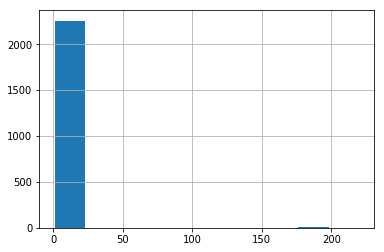

In [76]:
df_orig.groupby( ['dst_ip'] )['dst_port'].unique().apply(lambda x: len(x)).hist()

In [88]:
df_orig.groupby( ['dst_ip'] )['dst_port'].unique().apply(lambda x: len(x)).sort_values(ascending=False)


dst_ip
192.168.100.96     220
192.168.100.190    218
192.168.100.42     214
192.168.100.139    198
192.168.100.176    186
192.168.100.179    181
192.168.100.74     179
192.168.100.108    177
192.168.100.153    174
192.168.100.88     171
192.168.100.16     159
192.168.100.198    149
192.168.100.40     134
192.168.100.15     105
192.168.100.12     101
74.201.65.30        39
192.168.100.24      28
192.168.100.106     21
192.168.100.254     14
192.168.100.131     12
10.2.1.39           11
10.2.38.2            8
151.237.238.125      7
192.168.100.93       7
192.168.100.250      6
255.255.255.255      6
207.154.68.50        5
10.12.87.1           5
192.168.100.188      4
192.168.100.181      4
                  ... 
23.55.108.219        1
23.55.204.40         1
23.6.176.143         1
23.6.177.45          1
23.6.181.190         1
23.6.185.177         1
23.6.185.57          1
23.6.186.76          1
23.61.199.131        1
23.61.199.193        1
23.61.199.194        1
23.61.199.64         1
23.6

In [78]:
df_orig.hist?

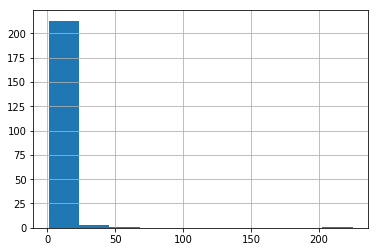

In [77]:
df_orig.groupby( ['src_ip'] )['dst_port'].unique().apply(lambda x: len(x)).hist()

In [85]:
df_orig.groupby( ['src_ip'] )['dst_port'].unique().apply(lambda x: len(x)).sort_values(ascending=False)

src_ip
192.168.100.96     225
10.2.1.39           54
199.91.71.89        32
192.168.100.254     26
199.91.71.85        25
199.91.71.86        21
192.168.100.136     12
10.2.20.8           12
192.168.100.131     12
192.168.100.12      10
192.168.111.158     10
192.168.100.243     10
192.168.100.242     10
10.2.33.4           10
192.168.100.241     10
192.168.100.123      9
8.8.8.8              9
10.12.24.4           9
192.168.100.176      9
192.168.100.10       8
10.2.1.20            8
74.125.28.189        8
192.168.100.240      8
10.2.20.5            8
10.2.20.4            8
192.168.100.40       8
10.2.20.1            8
10.2.20.2            8
10.2.20.3            8
10.2.20.7            8
                  ... 
192.168.100.230      1
216.58.217.202       1
192.150.187.238      1
52.42.157.208        1
10.200.51.173        1
51.184.154.93        1
50.184.221.182       1
10.2.254.56          1
47.204.1.132         1
10.2.33.2            1
47.200.96.71         1
192.168.100.231      1
10.2

In [97]:
port_usage = df_orig.groupby('dst_port')['src_tx', 'dst_tx'].sum()

port_usage['conns'] = df_orig.groupby('dst_port')['src_tx'].count()

port_usage['perc_up'] = port_usage['src_tx']/sum(port_usage['src_tx'])
port_usage['perc_dw'] = port_usage['dst_tx']/sum(port_usage['dst_tx'])
port_usage['perc_total'] = (port_usage['src_tx']+port_usage['dst_tx'])/(sum(port_usage['src_tx'])+sum(port_usage['dst_tx']))

In [99]:
port_usage.sort_values(by=['conns', 'perc_total'], ascending=False)

,src_tx,dst_tx,conns,perc_up,perc_dw,perc_total
dst_port,,,,,,
443,235803749,666986789,40823,5.835986e-02,1.466571e-01,1.051169e-01
80,921623719,1039909475,30719,2.280957e-01,2.286554e-01,2.283921e-01
53,984679,3729495,19792,2.437015e-04,8.200417e-04,5.488972e-04
3306,108785650,211633874,8851,2.692372e-02,4.653407e-02,3.730821e-02
5672,204614,1370641,4116,5.064060e-05,3.013767e-04,1.834156e-04
1194,378182715,478634963,4000,9.359770e-02,1.052423e-01,9.976399e-02
22,188358926,106149418,3766,4.661758e-02,2.334014e-02,3.429122e-02
8125,1102396,0,3538,2.728357e-04,0.000000e+00,1.283580e-04
6801,12905236,139603813,3297,3.193960e-03,3.069610e-02,1.775747e-02
